# Introduction

*   Our data spans 22 days, capturing a snapshot of **weather and air quality conditions** throughout this period.
*   We have at our disposal a dataset consisting of a staggering **4,287 rows**.
*   These records encompass information from a total of **197 unique locations (Cities )**, scattered across **185 countries**.



In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import datetime
import missingno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ipywidgets import widgets
import scipy.stats as stats

import os
from google.colab import files
from google.colab import output
output.enable_custom_widget_manager()

In [2]:
# Upload dataset to Colab workspace
uploaded = files.upload()

Saving GlobalWeather.csv to GlobalWeather.csv


In [3]:
os.getcwd()

'/content'

In [4]:
os.listdir()

['.config', 'GlobalWeather.csv', 'sample_data']

In [5]:
#!rm 'GlobalWeather.csv'

## Importing and exploring the dataset

In [6]:
# Import the dataset into a DataFrame

global_weather = pd.read_csv('GlobalWeather.csv')
global_weather.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,8/29/2023 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,5:24 AM,6:24 PM,5:39 PM,2:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,8/29/2023 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,6:04 AM,7:19 PM,6:50 PM,3:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,8/29/2023 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,6:16 AM,7:21 PM,6:46 PM,3:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,8/29/2023 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,7:16 AM,8:34 PM,8:08 PM,4:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,8/29/2023 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,6:11 AM,6:06 PM,4:43 PM,4:41 AM,Waxing Gibbous,93


In [7]:
global_weather.shape

(4287, 41)

In [8]:
columns = global_weather.columns.values
columns

array(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index',
       'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
       'moon_illumination'], dtype=object)

## Data cleaning

### Renaming columns

In [9]:
global_weather.rename({col: col.partition('air_quality_')[2] for col in global_weather.iloc[:, 27:35].columns}, axis = 1, inplace = True)
global_weather.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'Carbon_Monoxide', 'Ozone',
       'Nitrogen_dioxide', 'Sulphur_dioxide', 'PM2.5', 'PM10', 'us-epa-index',
       'gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase', 'moon_illumination'],
      dtype='object')

### Checking for duplicates

In [10]:
global_weather.duplicated().sum()

# Observation - Since the number returned is zero, it implies that every row in our dataset is unique.

0

### Checking for incorrectly listed entries

In [11]:
global_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 4287 non-null   object 
 1   location_name           4287 non-null   object 
 2   latitude                4287 non-null   float64
 3   longitude               4287 non-null   float64
 4   timezone                4287 non-null   object 
 5   last_updated_epoch      4287 non-null   int64  
 6   last_updated            4287 non-null   object 
 7   temperature_celsius     4287 non-null   float64
 8   temperature_fahrenheit  4287 non-null   float64
 9   condition_text          4287 non-null   object 
 10  wind_mph                4287 non-null   float64
 11  wind_kph                4287 non-null   float64
 12  wind_degree             4287 non-null   int64  
 13  wind_direction          4287 non-null   object 
 14  pressure_mb             4287 non-null   

In [12]:
global_weather.describe(include="object")

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,moon_phase
count,4287,4287,4287,4287,4287,4287,4287,4287,4287,4287,4287
unique,185,197,183,671,22,16,167,202,1016,1063,7
top,Bulgaria,Kabul,Europe/Rome,9/14/2023 16:30,Partly cloudy,N,5:54 AM,6:04 PM,No moonrise,7:42 PM,Waning Crescent
freq,66,22,66,47,1753,509,90,75,195,16,1170


In [13]:
moonrise_bool = global_weather['moonrise'].str.contains('No moonrise')
moonrise_bool

0       False
1       False
2       False
3       False
4       False
        ...  
4282    False
4283    False
4284    False
4285    False
4286    False
Name: moonrise, Length: 4287, dtype: bool

In [14]:
moonrise_bool.any()                                               # Returns True if there is at least one True in the Series
                                                                        # True => there exists at least 1 occurence of 'No moonrise'

True

In [15]:
moonrise_bool.sum()                                               # Number of occurences of 'No moonrise'

195

In [16]:
moonrise_bool[moonrise_bool].index                                # Positions of occurences of 'No moonrise'

Int64Index([1370, 1399, 1579, 1654, 1678, 1682, 1746, 1758, 1762, 1765,
            ...
            2496, 2522, 2524, 2527, 2589, 2593, 2610, 2663, 2677, 2702],
           dtype='int64', length=195)

In [17]:
# Changing the data type of the objects to appropriate data types

global_weather['country'] = global_weather['country'].astype('category')
global_weather['location_name'] = global_weather['location_name'].astype('category')
global_weather['timezone'] = global_weather['timezone'].astype('category')
global_weather['condition_text'] = global_weather['condition_text'].astype('category')
global_weather['moon_phase'] = global_weather['moon_phase'].astype('category')

global_weather['last_updated_epoch'] = pd.to_datetime(global_weather['last_updated_epoch'], unit='s', utc=True)
                                                            # converting the epoch to a datetime by calculating the number of seconds since 1/1/1970
global_weather['last_updated'] = pd.to_datetime(global_weather['last_updated'])

global_weather['sunrise'] = pd.to_datetime(global_weather['sunrise'], format='%I:%M %p').dt.time
global_weather['sunset'] = pd.to_datetime(global_weather['sunset'], format='%I:%M %p').dt.time
global_weather['moonrise'] = pd.to_datetime(global_weather['moonrise'], format='%I:%M %p', errors='coerce').dt.time
global_weather['moonset'] = pd.to_datetime(global_weather['moonset'], format='%I:%M %p').dt.time


global_weather.dtypes

country                              category
location_name                        category
latitude                              float64
longitude                             float64
timezone                             category
last_updated_epoch        datetime64[ns, UTC]
last_updated                   datetime64[ns]
temperature_celsius                   float64
temperature_fahrenheit                float64
condition_text                       category
wind_mph                              float64
wind_kph                              float64
wind_degree                             int64
wind_direction                         object
pressure_mb                             int64
pressure_in                           float64
precip_mm                             float64
precip_in                             float64
humidity                                int64
cloud                                   int64
feels_like_celsius                    float64
feels_like_fahrenheit             

In [18]:
global_weather['sunrise'].iloc[0]

datetime.time(5, 24)

In [19]:
global_weather['moonrise'].iloc[0]

datetime.time(17, 39)

In [20]:
global_weather.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,PM2.5,PM10,us-epa-index,gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,2023-08-29 09:30:00+00:00,2023-08-29 14:00:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24:00,18:24:00,17:39:00,02:48:00,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,2023-08-29 09:30:00+00:00,2023-08-29 11:30:00,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04:00,19:19:00,18:50:00,03:25:00,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,2023-08-29 09:30:00+00:00,2023-08-29 10:30:00,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16:00,19:21:00,18:46:00,03:50:00,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,2023-08-29 09:30:00+00:00,2023-08-29 11:30:00,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16:00,20:34:00,20:08:00,04:38:00,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,2023-08-29 09:30:00+00:00,2023-08-29 10:30:00,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11:00,18:06:00,16:43:00,04:41:00,Waxing Gibbous,93


### Checking for missing data

In [21]:
global_weather.isna().sum()

# Observation - There are no NaN values
# 'No Moonrise' has been converted to NaT...... NaT represents missing or invalid values in datetime data

country                     0
location_name               0
latitude                    0
longitude                   0
timezone                    0
last_updated_epoch          0
last_updated                0
temperature_celsius         0
temperature_fahrenheit      0
condition_text              0
wind_mph                    0
wind_kph                    0
wind_degree                 0
wind_direction              0
pressure_mb                 0
pressure_in                 0
precip_mm                   0
precip_in                   0
humidity                    0
cloud                       0
feels_like_celsius          0
feels_like_fahrenheit       0
visibility_km               0
visibility_miles            0
uv_index                    0
gust_mph                    0
gust_kph                    0
Carbon_Monoxide             0
Ozone                       0
Nitrogen_dioxide            0
Sulphur_dioxide             0
PM2.5                       0
PM10                        0
us-epa-ind

<Axes: >

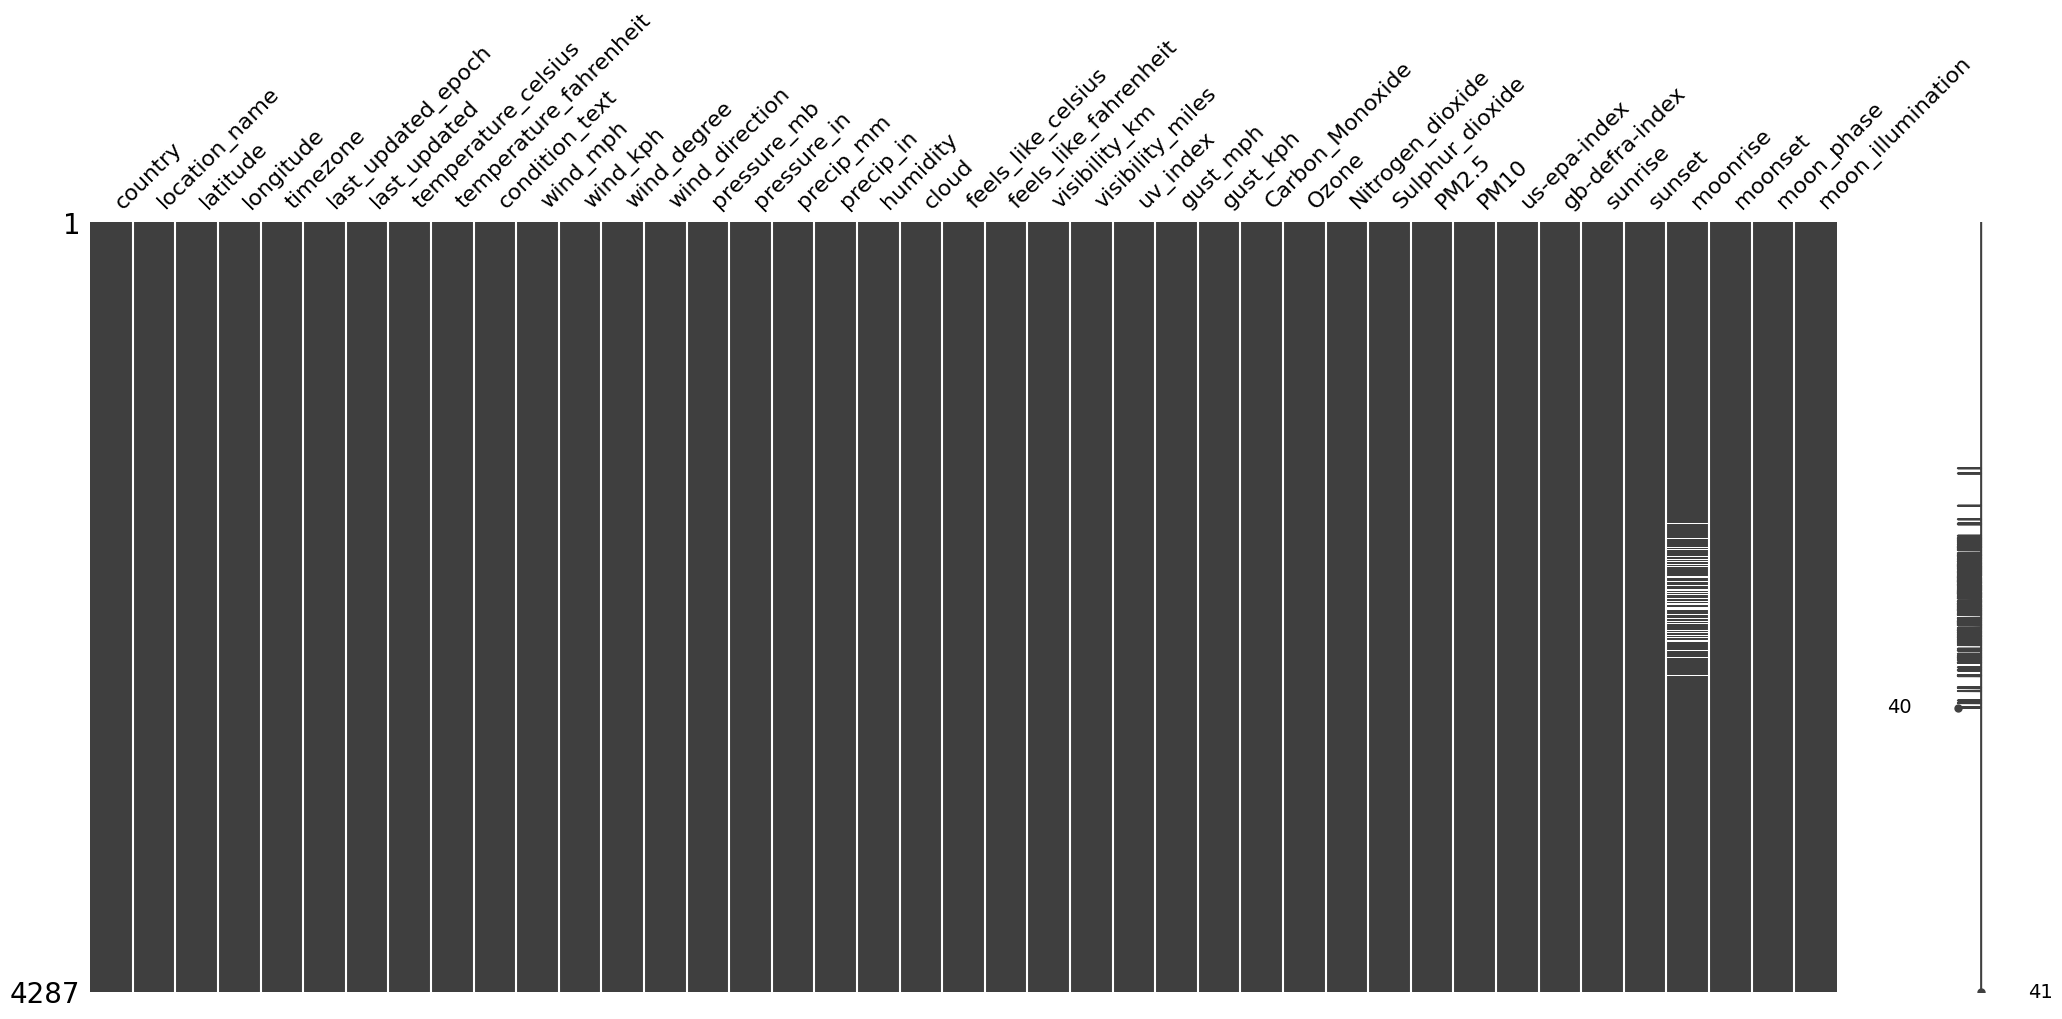

In [22]:
# Visual representation of the missing data in the dataset

missingno.matrix(global_weather)

## Statistical Analysis

In [23]:
glb_weather = global_weather.loc[:, ~global_weather.columns.isin(['temperature_fahrenheit', 'wind_mph', 'pressure_in', 'precip_in', 'feels_like_fahrenheit', 'visibility_miles', 'gust_mph'])]
glb_weather.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'condition_text', 'wind_kph', 'wind_degree', 'wind_direction',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius',
       'visibility_km', 'uv_index', 'gust_kph', 'Carbon_Monoxide', 'Ozone',
       'Nitrogen_dioxide', 'Sulphur_dioxide', 'PM2.5', 'PM10', 'us-epa-index',
       'gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase', 'moon_illumination'],
      dtype='object')

In [24]:
global_weather.describe()

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,gust_kph,Carbon_Monoxide,Ozone,Nitrogen_dioxide,Sulphur_dioxide,PM2.5,PM10,us-epa-index,gb-defra-index,moon_illumination
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,...,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,19.310317,21.846412,22.590390,72.662864,6.537229,10.521204,162.672032,1013.484955,29.926914,0.184133,...,16.903802,497.549498,41.762071,10.603009,6.336342,20.234430,32.882412,1.473291,2.066480,47.962911
std,24.582547,65.680281,6.548546,11.787471,4.530755,7.293441,103.833580,5.667049,0.167128,1.022778,...,10.768775,1065.430032,33.234958,18.853317,13.896266,54.178957,72.887348,0.908904,2.180817,39.328353
min,-41.300000,-175.200000,-2.000000,28.400000,2.200000,3.600000,1.000000,982.000000,29.000000,0.000000,...,0.000000,96.800000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,18.000000,64.400000,3.100000,5.000000,75.000000,1010.000000,29.830000,0.000000,...,9.000000,223.600000,18.400000,1.000000,0.400000,3.100000,5.500000,1.000000,1.000000,8.000000
50%,17.250000,23.240000,23.900000,75.000000,5.600000,9.000000,150.000000,1013.000000,29.910000,0.000000,...,15.000000,267.000000,36.800000,3.800000,1.400000,7.600000,12.700000,1.000000,1.000000,49.000000
75%,41.330000,50.580000,27.700000,81.900000,9.400000,15.100000,242.000000,1017.000000,30.030000,0.000000,...,22.300000,420.600000,57.200000,11.700000,5.450000,18.200000,29.200000,2.000000,2.000000,93.000000
max,63.830000,179.220000,45.000000,113.000000,46.100000,74.200000,360.000000,1036.000000,30.590000,31.000000,...,110.500000,21148.699000,320.400000,241.300000,169.800000,895.100000,1099.200000,6.000000,10.000000,100.000000


In [25]:
global_weather.describe(include=['category', 'object'])

,country,location_name,timezone,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,moon_phase
count,4287,4287,4287,4287,4287,4287,4287,4092,4287,4287
unique,185,197,183,22,16,167,202,1015,1063,7
top,Bulgaria,'S-Gravenwezel,Europe/Rome,Partly cloudy,N,05:54:00,18:04:00,05:51:00,19:42:00,Waning Crescent
freq,66,22,66,1753,509,90,75,17,16,1170


In [26]:
all_corr = glb_weather.corr()
all_corr

<ipython-input-26-2ee7b737104d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_corr = glb_weather.corr()


,latitude,longitude,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,...,gust_kph,Carbon_Monoxide,Ozone,Nitrogen_dioxide,Sulphur_dioxide,PM2.5,PM10,us-epa-index,gb-defra-index,moon_illumination
latitude,1.000000,-0.012946,-0.212455,-0.133391,0.069346,-0.032076,-0.026931,0.118230,-0.129685,-0.220043,...,-0.136533,-0.136347,0.074767,0.104529,0.028229,-0.067472,-0.070703,-0.030460,-0.027831,0.000021
longitude,-0.012946,1.000000,-0.082883,-0.097008,0.021482,-0.099416,-0.003362,0.087272,0.047590,-0.095380,...,-0.047505,0.084440,-0.123249,0.066551,0.079316,0.125652,0.136612,0.168636,0.170316,-0.001577
temperature_celsius,-0.212455,-0.082883,1.000000,0.141516,0.009488,-0.557531,0.027785,-0.232697,0.075645,0.969729,...,0.214200,0.013554,0.178883,-0.010497,0.073612,0.026547,0.089370,0.088815,0.090222,-0.023750
wind_kph,-0.133391,-0.097008,0.141516,1.000000,0.099575,-0.096546,0.033535,-0.092590,0.157593,0.145306,...,0.568537,-0.112120,0.202671,-0.174109,-0.098212,-0.125978,-0.106515,-0.183426,-0.174872,0.012928
wind_degree,0.069346,0.021482,0.009488,0.099575,1.000000,-0.063781,0.023963,0.004575,0.027570,0.003114,...,0.047171,-0.003900,0.080588,-0.020118,-0.027969,0.003173,0.016698,0.006068,-0.003097,0.031285
pressure_mb,-0.032076,-0.099416,-0.557531,-0.096546,-0.063781,1.000000,-0.048373,0.061262,-0.114283,-0.540124,...,-0.168512,-0.028797,-0.101406,-0.046637,-0.092219,-0.064641,-0.116523,-0.143456,-0.156093,-0.015742
precip_mm,-0.026931,-0.003362,0.027785,0.033535,0.023963,-0.048373,1.000000,0.125208,0.184434,0.051975,...,0.069068,-0.006738,-0.039353,-0.028304,-0.003767,-0.031734,-0.042395,-0.045734,-0.040212,0.089413
humidity,0.118230,0.087272,-0.232697,-0.092590,0.004575,0.061262,0.125208,1.000000,0.372744,-0.131675,...,-0.036240,0.062077,-0.364122,-0.055013,-0.100957,0.019224,-0.061776,-0.070994,-0.059254,0.053971
cloud,-0.129685,0.047590,0.075645,0.157593,0.027570,-0.114283,0.184434,0.372744,1.000000,0.113424,...,0.107963,-0.001093,-0.123182,-0.104005,-0.056661,-0.064395,-0.095000,-0.137401,-0.113438,0.058986
feels_like_celsius,-0.220043,-0.095380,0.969729,0.145306,0.003114,-0.540124,0.051975,-0.131675,0.113424,1.000000,...,0.204696,0.015297,0.152960,-0.018553,0.070712,0.021056,0.072184,0.078738,0.086321,-0.015695


In [27]:
fig = px.imshow(all_corr, text_auto=True, aspect="auto", color_continuous_scale = 'Viridis', width=2000, height=1400)
fig.update_xaxes(side="top")

fig.show()

In [28]:
# Plotting only the significant correlation

fig = px.imshow(all_corr[(all_corr >= 0.5) |(all_corr <= -0.35)], text_auto=True, aspect="auto", color_continuous_scale = 'Cividis_r', width=1200, height=800)
fig.update_xaxes(side="top")
fig.show()

## Exploratory data analysis

### Feature Analysis - Univariate Analysis

In [29]:
def plot_box_hist(col1, col2, nbins, title):
  fig = make_subplots(rows=2, cols=2)

  trace0 = go.Box(y  = global_weather[col1], name = col1)
  trace1 = go.Box(y = global_weather[col2], name = col2)
  trace2 = go.Histogram(x  = global_weather[col1], name = col1, nbinsx = nbins)
  trace3 = go.Histogram(x = global_weather[col2], name = col2, nbinsx = nbins)

  fig.add_trace(trace0, row=1, col=1)
  fig.add_trace(trace1, row=1, col=2)
  fig.add_trace(trace2, row=2, col=1)
  fig.add_trace(trace3, row=2, col=2)

  fig.update_layout(height=800, width=1200, title_text=title, showlegend=True)
  fig.show()

In [30]:
print('Number of Weather condition types: ', len(global_weather['condition_text'].unique()), '\n')
global_weather['condition_text'].value_counts()

Number of Weather condition types:  22 



Partly cloudy                          1753
Clear                                  1513
Sunny                                   248
Overcast                                136
Light rain                              116
Mist                                    116
Patchy rain possible                    108
Light rain shower                        73
Moderate or heavy rain with thunder      50
Patchy light rain with thunder           45
Fog                                      35
Cloudy                                   25
Moderate rain                            23
Moderate or heavy rain shower            14
Thundery outbreaks possible              10
Light drizzle                             5
Heavy rain                                4
Moderate rain at times                    3
Patchy light rain                         3
Torrential rain shower                    3
Patchy light drizzle                      2
Heavy rain at times                       2
Name: condition_text, dtype: int

In [31]:
print('Number of distinct wind directions: ', len(global_weather['wind_direction'].unique()), '\n')
global_weather['wind_direction'].value_counts()

Number of distinct wind directions:  16 



N      509
E      395
S      318
ESE    310
ENE    276
SE     265
SW     260
SSW    257
NE     257
W      244
WSW    227
SSE    220
NNE    210
NW     188
NNW    186
WNW    165
Name: wind_direction, dtype: int64

In [32]:
print('Number of distinct moon illumination values: ', global_weather['moon_illumination'].unique())

Number of distinct moon illumination values:  [ 93  98 100  99  94  88  79  70  60  49  39  30  22  14   8   1   0   3]


In [33]:
plot_box_hist('temperature_celsius', 'feels_like_celsius', 50, 'Temperature & Feel temperature in Celsius')

In [34]:
plot_box_hist('temperature_fahrenheit', 'feels_like_fahrenheit', 50, 'Temperature & Feel temperature in Fahrenheit')

In [35]:
plot_box_hist('wind_mph', 'wind_kph', 20, 'Wind speed in mph and kph')

In [36]:
plot_box_hist('pressure_mb', 'pressure_in', 20, 'Presssure in millibars and inches')

In [37]:
plot_box_hist('precip_mm', 'precip_in', 50, 'Precipitation in mm and inches')

In [38]:
plot_box_hist('visibility_km', 'visibility_miles', 12, 'Visibility in km and miles')

In [39]:
px.box(global_weather, y = 'humidity')

In [40]:
px.histogram(global_weather, 'humidity', nbins = 20)

In [41]:
plot_box_hist('gust_mph', 'gust_kph', 12, 'Wind gust in mph and kph')

In [42]:
fig = make_subplots(rows=4, cols=2)

trace0 = go.Histogram(x  = global_weather['Carbon_Monoxide'], name = 'Carbon_Monoxide', nbinsx = 30)
trace1 = go.Histogram(x  = global_weather['Ozone'], name = 'Ozone')
trace2 = go.Histogram(x  = global_weather['Nitrogen_dioxide'], name = 'Nitrogen_dioxide', nbinsx = 30)
trace3 = go.Histogram(x = global_weather['Sulphur_dioxide'], name = 'Sulphur_dioxide', nbinsx = 30)
trace4 = go.Histogram(x = global_weather['PM2.5'], name = 'PM2.5', nbinsx = 30)
trace5 = go.Histogram(x  = global_weather['PM10'], name = 'PM10', nbinsx = 30)
trace6 = go.Histogram(x = global_weather['us-epa-index'], name = 'us-epa-index')
trace7 = go.Histogram(x  = global_weather['gb-defra-index'], name = 'gb-defra-index')

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)
fig.add_trace(trace2, row=2, col=1)
fig.add_trace(trace3, row=2, col=2)
fig.add_trace(trace4, row=3, col=1)
fig.add_trace(trace5, row=3, col=2)
fig.add_trace(trace6, row=4, col=1)
fig.add_trace(trace7, row=4, col=2)

fig.update_layout(height=800, width=1200, title_text='AQI measurements', showlegend=True)
fig.show()

### Feature Analysis - Bivariate Analysis

In [43]:
px.box(global_weather, x = 'condition_text', y = 'temperature_celsius')

In [44]:
px.box(global_weather, x = 'condition_text', y = 'feels_like_celsius')

In [45]:
px.box(global_weather, x = 'condition_text', y = 'humidity')

In [46]:
px.scatter(global_weather, x = 'temperature_celsius', y = 'humidity',
           marginal_x='histogram',
           marginal_y='rug')

In [47]:
condition_grps = glb_weather.groupby('condition_text')

#data = condition_grps['cloud'].mean()
data = condition_grps['cloud'].median()
data_sorted = data.sort_values(ascending=False)
px.bar(data_sorted, y = 'cloud', title = 'Median cloud cover as a percentage', color_discrete_sequence = px.colors.sequential.Plasma)

In [48]:
condition_grps = glb_weather.groupby('condition_text')
cloud_grp = condition_grps.get_group('Cloudy')
cloud_grp

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,...,PM2.5,PM10,us-epa-index,gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
13,Bangladesh,Dhaka,23.72,90.41,Asia/Dhaka,2023-08-29 09:30:00+00:00,2023-08-29 15:30:00,34.0,Cloudy,5.4,...,84.8,95.6,4,10,05:39:00,18:19:00,17:18:00,03:17:00,Waxing Gibbous,93
604,Bhutan,Thimphu,27.48,89.60,Asia/Thimphu,2023-08-31 23:45:00+00:00,2023-09-01 05:45:00,12.3,Cloudy,3.6,...,14.8,15.0,1,2,05:40:00,18:24:00,18:52:00,05:36:00,Waning Gibbous,100
661,Iceland,Hella,63.83,-20.40,Atlantic/Reykjavik,2023-08-31 23:45:00+00:00,2023-08-31 23:45:00,10.8,Cloudy,19.1,...,0.9,2.1,1,1,06:01:00,20:41:00,21:07:00,06:01:00,Waning Gibbous,100
722,Peru,Lima,-12.05,-77.05,America/Lima,2023-08-31 23:45:00+00:00,2023-08-31 18:45:00,18.7,Cloudy,14.8,...,11.1,27.5,1,1,06:12:00,18:05:00,18:57:00,06:44:00,Waning Gibbous,100
739,Seychelles Islands,Victoria,-4.62,55.45,Indian/Mahe,2023-08-31 23:45:00+00:00,2023-09-01 03:45:00,26.2,Cloudy,27.4,...,4.7,20.6,1,1,06:18:00,18:19:00,18:50:00,06:30:00,Waning Gibbous,100
745,Somalia,Mogadishu,2.07,45.37,Africa/Mogadishu,2023-08-31 23:45:00+00:00,2023-09-01 02:45:00,24.6,Cloudy,27.7,...,9.6,16.4,1,1,05:55:00,18:03:00,18:36:00,06:06:00,Waning Gibbous,100
1171,Algeria,Algiers,36.76,3.05,Africa/Algiers,2023-09-03 23:30:00+00:00,2023-09-04 00:30:00,36.0,Cloudy,13.0,...,144.4,766.7,4,10,06:20:00,19:14:00,21:20:00,10:07:00,Waning Gibbous,88
1539,Bulgaria,Lom,43.81,23.24,Europe/Bucharest,2023-09-04 23:30:00+00:00,2023-09-05 02:30:00,16.2,Cloudy,4.7,...,3.6,4.2,1,1,06:53:00,19:58:00,22:11:00,12:09:00,Waning Gibbous,79
1696,Peru,Lima,-12.05,-77.05,America/Lima,2023-09-05 23:15:00+00:00,2023-09-05 18:15:00,18.6,Cloudy,15.5,...,4.1,12.3,1,1,06:09:00,18:05:00,23:39:00,10:27:00,Waning Gibbous,70
1977,Madagascar,Ivory,-24.37,46.45,Indian/Antananarivo,2023-09-07 23:00:00+00:00,2023-09-08 02:00:00,19.7,Cloudy,5.0,...,3.3,10.7,1,1,06:00:00,17:45:00,00:30:00,11:07:00,Waning Crescent,49


In [50]:
# Group the moon phases and calculate the mean of moon illumination
glb_weather_moon = glb_weather.groupby('moon_phase')['moon_illumination'].agg(['mean']).reset_index()

glb_weather_moon = glb_weather_moon.rename(columns={'mean': 'moon_illumination'})
glb_weather_moon

,moon_phase,moon_illumination
0,Full Moon,98.000000
1,Last Quarter,60.000000
2,New Moon,1.000000
3,Waning Crescent,27.000000
4,Waning Gibbous,88.324209
5,Waxing Crescent,2.996144
6,Waxing Gibbous,93.000000


In [51]:
fig = px.pie(
    glb_weather_moon,
    names='moon_phase',
    values='moon_illumination',
    title='Moon Phase and Moon Illumination',
    height=600,
    hole=0.4,
    labels=(
        {
            'moon_phase': 'Moon Phase',
            'moon_illumination': 'Moon Illumination (%)'
        }
    ),
)

fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

### Feature Analysis - Multivariate Analysis

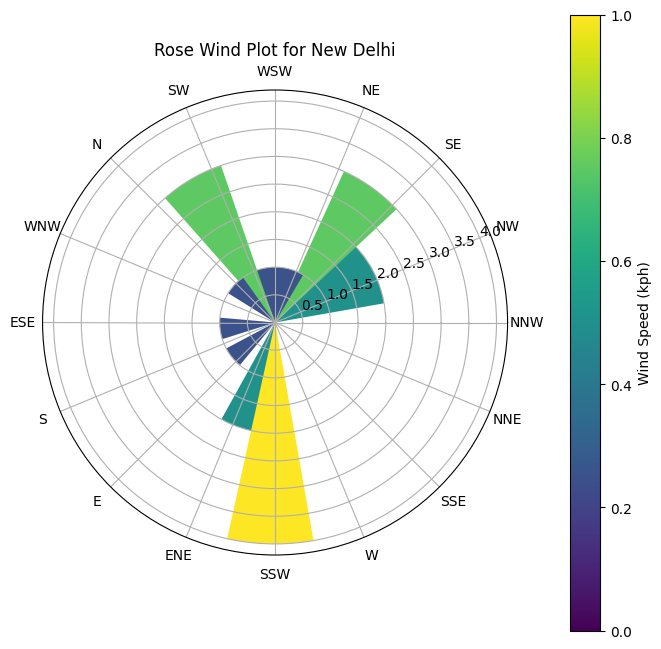

In [53]:
user_location = 'New Delhi'  # Change this into your desired location

# Filter dataframe for the desired location
location_df = glb_weather[glb_weather['location_name'] == user_location]

# Extracting wind df
wind_speeds = location_df['wind_kph']
wind_degrees = location_df['wind_degree']

# Converting wind degrees to radians
wind_radians = np.deg2rad(wind_degrees)

#rose wind plot

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
n_bins = 16
hist, bins = np.histogram(wind_radians, bins=n_bins)

# width of each bin
width = 2 * np.pi / n_bins

# list of colors for each bin
colors = plt.cm.viridis(hist / hist.max())

# histogram as a bar plot with colors
bars = ax.bar(bins[:-1], hist, width=width, align="edge", color=colors)

# direction labels
ax.set_xticks(np.arange(0, 2 * np.pi, width))
ax.set_xticklabels(['NNW','NW','SE','NE','WSW','SW','N','WNW','ESE','S','E','ENE','SSW','W','SSE','NNE'])

#color bar legend
color_legend = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), ax=ax, pad=0.1)
color_legend.set_label('Wind Speed (kph)')

plt.title(f'Rose Wind Plot for {user_location}')
plt.show()

## Forecasting and Inferences

### Feature Engineering

In [56]:
# Splitting the data based on climate zones

glb_weather.loc[(glb_weather['latitude'] < 23.5) & (glb_weather['latitude'] > -23.5), 'region'] = 'Tropical'
glb_weather.loc[((glb_weather['latitude'] >= 23.5) & (glb_weather['latitude'] <= 66.5)) | ((glb_weather['latitude'] <= -23.5) & (glb_weather['latitude'] >= -66.5)), 'region'] = 'Temperate'
glb_weather.loc[(glb_weather['latitude'] > 66.5) | (glb_weather['latitude'] < -66.5), 'region'] = 'Polar'

In [57]:
# counting unique 'location_name' values for each region

tropical_df = glb_weather[glb_weather['region'] == 'Tropical']
temperate_df = glb_weather[glb_weather['region'] == 'Temperate']
polar_df = glb_weather[glb_weather['region'] == 'Polar']

tropical_location_count = tropical_df['location_name'].nunique()
temperate_location_count = temperate_df['location_name'].nunique()
polar_location_count = polar_df['location_name'].nunique()


print("Total Locations in Tropical region:", tropical_location_count)
print("Total Locations in Temperate region:", temperate_location_count)
print("Total Locations in Polar region:", polar_location_count)

Total Locations in Tropical region: 97
Total Locations in Temperate region: 100
Total Locations in Polar region: 0


Observation - No data available from Polar region

### Temperature Trends

In [58]:
city_country = {}

cities = global_weather['location_name'].unique()
for city in cities:
  city_first_index = global_weather[global_weather['location_name'] == city].index[0]
  city_country[city] = global_weather.loc[city_first_index, 'country']

city_country

{'Kabul': 'Afghanistan',
 'Tirana': 'Albania',
 'Algiers': 'Algeria',
 'Andorra La Vella': 'Andorra',
 'Luanda': 'Angola',
 "Saint John's": 'Antigua and Barbuda',
 'Buenos Aires': 'Argentina',
 'Yerevan': 'Armenia',
 'Canberra': 'Australia',
 'Vienna': 'Austria',
 'Baku': 'Azerbaijan',
 'Nassau': 'Bahamas',
 'Manama': 'Bahrain',
 'Dhaka': 'Bangladesh',
 'Bridgetown': 'Barbados',
 'Minsk': 'Belarus',
 'Brussels': 'Belgium',
 'Belmopan': 'Belize',
 'Porto-Novo': 'Benin',
 'Thimphu': 'Bhutan',
 'Sucre': 'Bolivia',
 'Sarajevo': 'Bosnia and Herzegovina',
 'Gaborone': 'Botswana',
 'Bras': 'Brazil',
 'Bandar Seri Begawan': 'Brunei Darussalam',
 'Sofia': 'Bulgaria',
 'Ouagadougou': 'Burkina Faso',
 'Bujumbura': 'Burundi',
 'Ivory': 'Madagascar',
 'Praia': 'Cape Verde',
 'Phnom Penh': 'Cambodia',
 'Bafoussam': 'Cameroon',
 'Ottawa': 'Canada',
 'Bangui': 'Central African Republic',
 "N'djamena": 'Chad',
 'Santiago': 'Chile',
 'Beijing': 'China',
 'Bogot': 'Bulgaria',
 'Moroni': 'Comoros',
 'Braz

In [59]:
global_country_grp_mean = glb_weather.groupby('country').mean().reset_index()
global_temp_mean = global_country_grp_mean.sort_values(by = 'temperature_celsius')
px.bar(global_temp_mean, x='country', y='temperature_celsius', color = 'temperature_celsius',
       color_discrete_sequence = px.colors.sequential.thermal,
       title='Average Temperature by Country')

<ipython-input-59-21cc452224cc>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [60]:
global_city_grp_mean = glb_weather.groupby('location_name').mean().reset_index()
global_temp_mean = global_city_grp_mean.sort_values(by = 'temperature_celsius')

<ipython-input-60-2a3d1832f075>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [61]:
def create_bar_chart(data, title, color):
    fig = px.bar(data, x='location_name', y='temperature_celsius', title=title)
    fig.update_traces(marker_color=color, marker_line_color='black', marker_line_width=1)
    fig.update_xaxes(categoryorder='total ascending')
    return fig

In [62]:
coldest_chart_color = 'rgb(75, 136, 230)'  # Blue
hottest_chart_color = 'rgb(255, 87, 51)'  # Red

coldest_5_cities = global_temp_mean.iloc[:5, :]
hottest_5_cities = global_temp_mean.iloc[-5:, :]

hottest_bar_chart = create_bar_chart(hottest_5_cities.sort_values(by = 'temperature_celsius', ascending = False),
                                     'Top 5 Cities by Maximum Average Temperature', hottest_chart_color)
coldest_bar_chart = create_bar_chart(coldest_5_cities, 'Bottom 10 Cities by Minimum Average Temperature', coldest_chart_color)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Coldest 5 Cities', 'Hottest 5 Cities'))
fig.add_trace(coldest_bar_chart.data[0], row=1, col=1)
fig.add_trace(hottest_bar_chart.data[0], row=1, col=2)

fig.show()

Mean Temperature(°C), Pressure(mb) and Humidity Data - Location Wise

In [63]:
grouped_data = glb_weather.groupby(['latitude', 'longitude'])[['temperature_celsius', 'pressure_mb', 'humidity']].mean().reset_index()

# Merging 'location_name' back to the grouped data
grouped_data = pd.merge(grouped_data, glb_weather[['latitude', 'longitude', 'location_name']], on=['latitude', 'longitude'], how='left')

# scatter plot with hover information
fig = px.scatter_geo(grouped_data,
                     lat='latitude',
                     lon='longitude',
                     hover_name='location_name',
                     hover_data=['temperature_celsius', 'pressure_mb', 'humidity'],
                     color='temperature_celsius',
                     labels={'temperature_celsius': 'Mean Temp (°C)',
                             'pressure_mb': 'Mean Pressure (mb)',
                             'humidity': 'Humidity'},
                     title='Mean Weather Data',
                     projection="natural earth")

fig.show()

In [64]:
aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)

data = [dict(
  type = 'choropleth',
  locationmode = 'country names',
  locations = glb_weather['country'],
  z = glb_weather['temperature_celsius'],
  autocolorscale = False,
  colorscale = 'Viridis',
  reversescale = True,
  transforms = [dict(
    type = 'aggregate',
    groups = glb_weather['country'],
    aggregations = [dict(
        target = 'z', func = 'avg', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Temperature (°C) Aggregations</b><br>use dropdown to change aggregation function',
  #xaxis = dict(title = 'Subject'),
  #yaxis = dict(title = 'Score', range = [0,22]),
  height = 600,
  width = 900,
  updatemenus = [dict(
        x = 1.05,
        y = 1.10,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 2,
        showactive = False,
        buttons = agg_func
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

In [65]:
countries = glb_weather['country'].unique()
rand_country_list = np.random.choice(countries, 4)

temp_trend = glb_weather[glb_weather['country'].isin(rand_country_list)]
temp_trend_grp = temp_trend.groupby('country')

temp_trend.head(4)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,condition_text,wind_kph,...,us-epa-index,gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,heat_zone,region
28,Madagascar,Ivory,-24.37,46.45,Indian/Antananarivo,2023-08-29 09:30:00+00:00,2023-08-29 12:30:00,22.9,Sunny,10.1,...,1,1,06:09:00,17:42:00,15:57:00,04:54:00,Waxing Gibbous,93,Temperate,Temperate
97,Thailand,Nan,18.78,100.78,Asia/Bangkok,2023-08-29 09:45:00+00:00,2023-08-29 16:45:00,33.0,Partly cloudy,3.6,...,1,1,06:01:00,18:34:00,17:25:00,03:44:00,Waxing Gibbous,93,Tropical,Tropical
101,Madagascar,Antananarivo,-18.92,47.52,Indian/Antananarivo,2023-08-29 09:45:00+00:00,2023-08-29 12:45:00,21.0,Partly cloudy,24.1,...,1,1,06:01:00,17:42:00,16:02:00,04:38:00,Waxing Gibbous,93,Tropical,Tropical
132,Palau,Adkip,7.36,134.51,Pacific/Palau,2023-08-29 09:45:00+00:00,2023-08-29 18:45:00,29.0,Partly cloudy,19.1,...,1,1,05:55:00,18:11:00,16:44:00,03:46:00,Waxing Gibbous,93,Tropical,Tropical


In [66]:
fig = go.Figure()
colors = ['firebrick', 'rebeccapurple', 'royalblue', 'mediumseagreen']

for idx in range(4):
  country = rand_country_list[idx]
  rand_country_grp = temp_trend_grp.get_group(country)
  fig.add_trace(go.Scatter(x = rand_country_grp['last_updated'], y = rand_country_grp['temperature_celsius'],
                           mode='lines+markers',
                           name = country,
                           line=dict(color=colors[idx])))

fig.update_layout(title='Temperature Trends for randomly selected 4 cities',
                   xaxis_title='Last Updated',
                   yaxis_title='Temperature (°C)')
fig.show()

In [67]:
option_list = ['uv_index', 'wind_kph', 'Carbon_Monoxide', 'Ozone', 'Nitrogen_dioxide', 'Sulphur_dioxide', 'PM2.5', 'PM10']
option_val_tuple = list((k,v) for v, k in list(enumerate(option_list, 1)))
option_val_tuple

[('uv_index', 1),
 ('wind_kph', 2),
 ('Carbon_Monoxide', 3),
 ('Ozone', 4),
 ('Nitrogen_dioxide', 5),
 ('Sulphur_dioxide', 6),
 ('PM2.5', 7),
 ('PM10', 8)]

In [68]:
text_dict = {1: ['uv_index', 'UV index'],
             2: ['wind_kph', 'Wind Seepd in kph'],
             3: ['Carbon_Monoxide', 'Carbon monoxide'],
             4: ['Ozone', 'Ozone'],
             5: ['Nitrogen_dioxide', 'Nitrogen dioxide'],
             6: ['Sulphur_dioxide', 'Sulphur dioxide'],
             7: ['PM2.5', 'PM 2.5'],
             8: ['PM10', 'PM 10']}

In [108]:
pollutants = widgets.RadioButtons(
    options = option_val_tuple,
    value = 1,            # Default value
    disabled = False
)

# Assign an empty figure widget with two traces
min_value = min(global_country_grp_mean['uv_index'])      # Minimum mean value by country
max_value = max(global_country_grp_mean['uv_index'])
delta_value = global_country_grp_mean['uv_index'].mean()  # Mean value of parameter
text = 'UV index'

fw = go.FigureWidget({
    'data': [{'delta': {'reference': delta_value},
              'domain': {'x': [0, 1], 'y': [0, 1]},
              'gauge': {'axis': {'range': [None, 40]},
                        'bar': {'color': 'darkblue'},
                        'steps': [{'color': 'whitesmoke', 'range': [0, 10]},
                                  {'color': 'palegreen', 'range': [10, 20]},
                                  {'color': 'lightsalmon', 'range': [20, 30]},
                                  {'color': 'indianred', 'range': [30, 40]}]},
              'mode': 'gauge+number+delta',
              'title': {'text': 'UV index'},
              'type': 'indicator',
              'value': min_value}]})

In [109]:
def update_pollutant_widget(change):
  selected_option=pollutants.value
  selected_col = text_dict[selected_option][0]
  min_value = min(global_country_grp_mean[selected_col])    # Minimum mean value by country
  max_value = max(global_country_grp_mean[selected_col])    # Maximum mean value by country
  avg_value = global_country_grp_mean[selected_col].mean()  # Mean value of parameter
  text = text_dict[selected_option][1]
  with fw.batch_update():
    trace1 = fw.data[0]
    trace1.delta.reference = avg_value
    trace1.value = min_value
    trace1.title.text = text
    trace2 = fw.data[1]
    trace1.delta.reference = avg_value
    trace1.value = max_value
    trace1.title.text = text

pollutants.observe(update_pollutant_widget , names='value')

widgets.HBox([pollutants])

In [110]:
widgets.VBox([fw])

    'data': [{'delta': {'reference': 2.4263621398505117},
              'domain'…

In [104]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [72]:
px.scatter(global_weather, x='temperature_celsius', y='humidity', color='country', title='Temperature vs Humidity', color_discrete_sequence = px.colors.diverging.delta)

In [73]:
px.scatter(global_weather, x = 'temperature_celsius', y = 'humidity',
           size='visibility_km',
           color='condition_text',
           facet_col = 'wind_direction',
           facet_col_wrap = 4)

### Precipitation Trends

In [74]:
px.scatter(global_weather, x='humidity', y='precip_mm', color='country', title='Humidity vs Precipitation in mm', color_discrete_sequence = px.colors.sequential.Teal)

Day Wise Percipitation (mm) - Taking Location as User Input

Please Enter the location name for check day wise Precipitation: Colombo


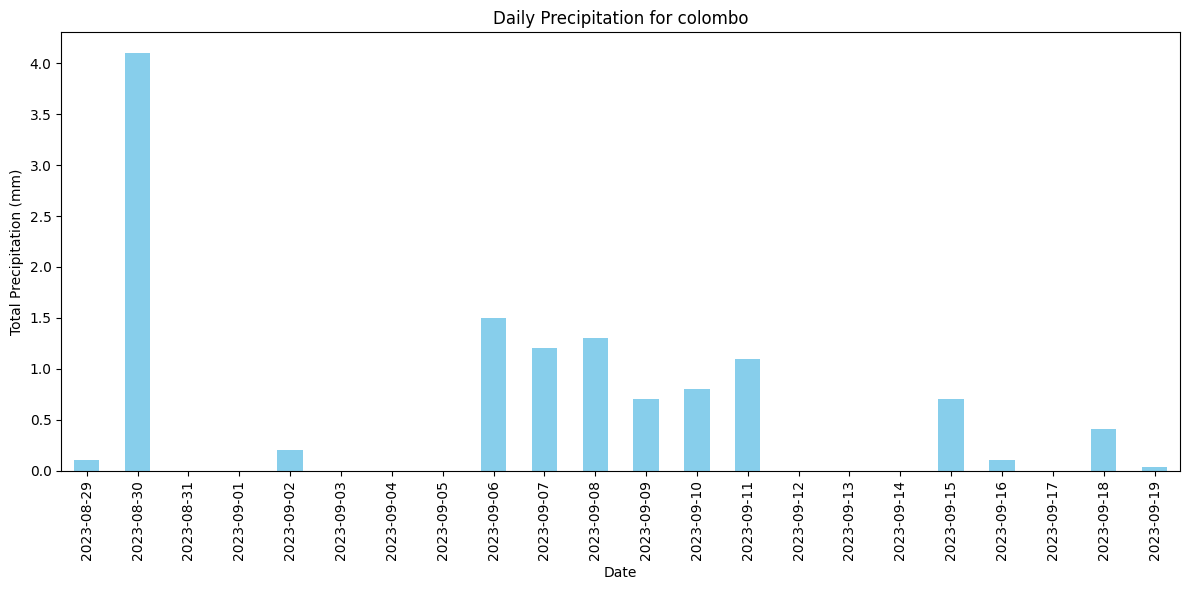

In [75]:
location_name = input('Please Enter the location name for check day wise Precipitation: ').strip().lower()

# Filtering the DataFrame for the specific location
location_data = glb_weather[glb_weather['location_name'].str.lower() == location_name]

if location_data.empty:
    print(f"No data found for the location '{location_name}'. Please check the spelling and try again.")

else:

    # Extracting the date part from the 'last_updated' column
    location_data['date'] = location_data['last_updated'].dt.date

    # total precipitation for each day
    daily_precipitation = location_data.groupby('date')['precip_mm'].sum()

    # bar plot for daily precipitation
    plt.figure(figsize=(12, 6))
    daily_precipitation.plot(kind='bar', color='skyblue')
    plt.title(f'Daily Precipitation for {location_name}')
    plt.xlabel('Date')
    plt.ylabel('Total Precipitation (mm)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## Geographical Trends

Distribution Comparison (Tropical vs Temperate)

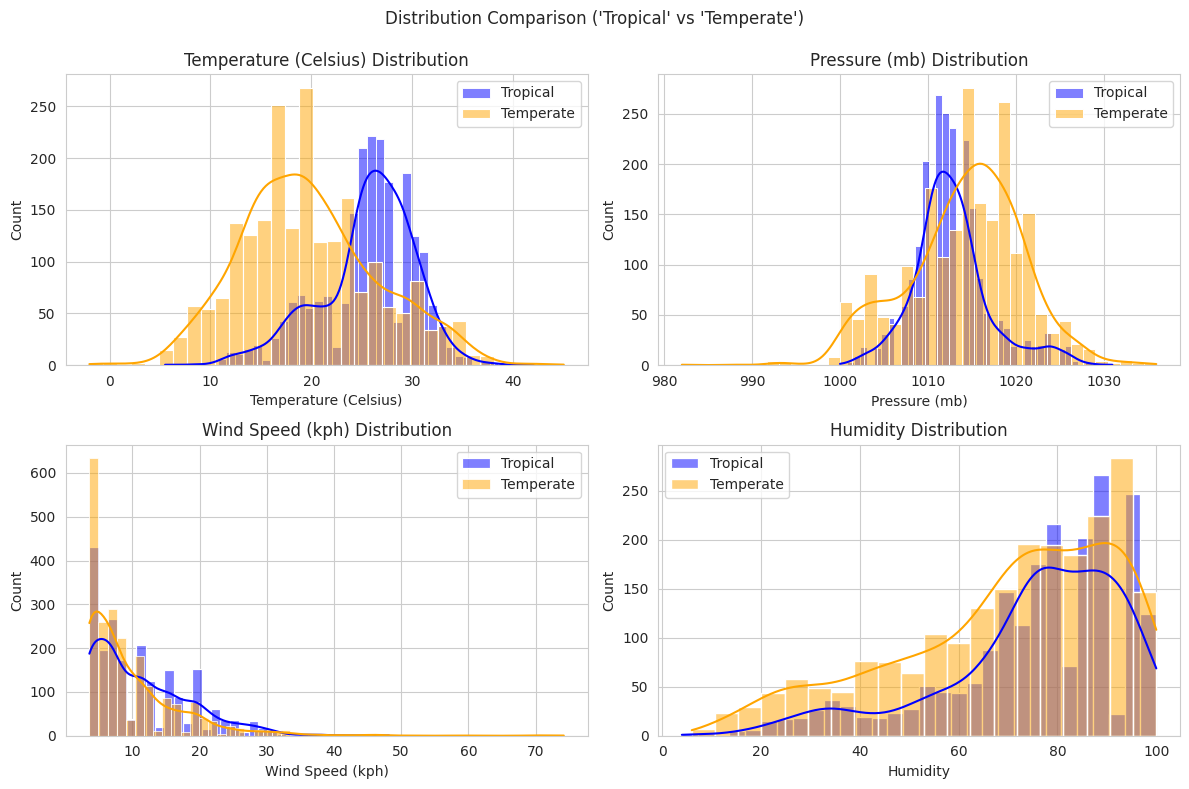

In [77]:
tropical_data = glb_weather[glb_weather['region'] == 'Tropical']
temperate_data = glb_weather[glb_weather['region'] == 'Temperate']

sns.set_style("whitegrid")

# 2 x 2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution Comparison ('Tropical' vs 'Temperate')")

# temperature_celsius distribution
sns.histplot(tropical_data['temperature_celsius'], ax=axes[0, 0], label='Tropical', kde=True, color='blue')
sns.histplot(temperate_data['temperature_celsius'], ax=axes[0, 0], label='Temperate', kde=True, color='orange')
axes[0, 0].set_title('Temperature (Celsius) Distribution')
axes[0, 0].set_xlabel('Temperature (Celsius)')
axes[0, 0].legend()

# pressure_mb distribution
sns.histplot(tropical_data['pressure_mb'], ax=axes[0, 1], label='Tropical', kde=True, color='blue')
sns.histplot(temperate_data['pressure_mb'], ax=axes[0, 1], label='Temperate', kde=True, color='orange')
axes[0, 1].set_title('Pressure (mb) Distribution')
axes[0, 1].set_xlabel('Pressure (mb)')
axes[0, 1].legend()

# wind_mph distribution
sns.histplot(tropical_data['wind_kph'], ax=axes[1, 0], label='Tropical', kde=True, color='blue')
sns.histplot(temperate_data['wind_kph'], ax=axes[1, 0], label='Temperate', kde=True, color='orange')
axes[1, 0].set_title('Wind Speed (kph) Distribution')
axes[1, 0].set_xlabel('Wind Speed (kph)')
axes[1, 0].legend()

# humidity distribution
sns.histplot(tropical_data['humidity'], ax=axes[1, 1], label='Tropical', kde=True, color='blue')
sns.histplot(temperate_data['humidity'], ax=axes[1, 1], label='Temperate', kde=True, color='orange')
axes[1, 1].set_title('Humidity Distribution')
axes[1, 1].set_xlabel('Humidity')
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Co-Relation Heatmap for Tropical and Temperate Data

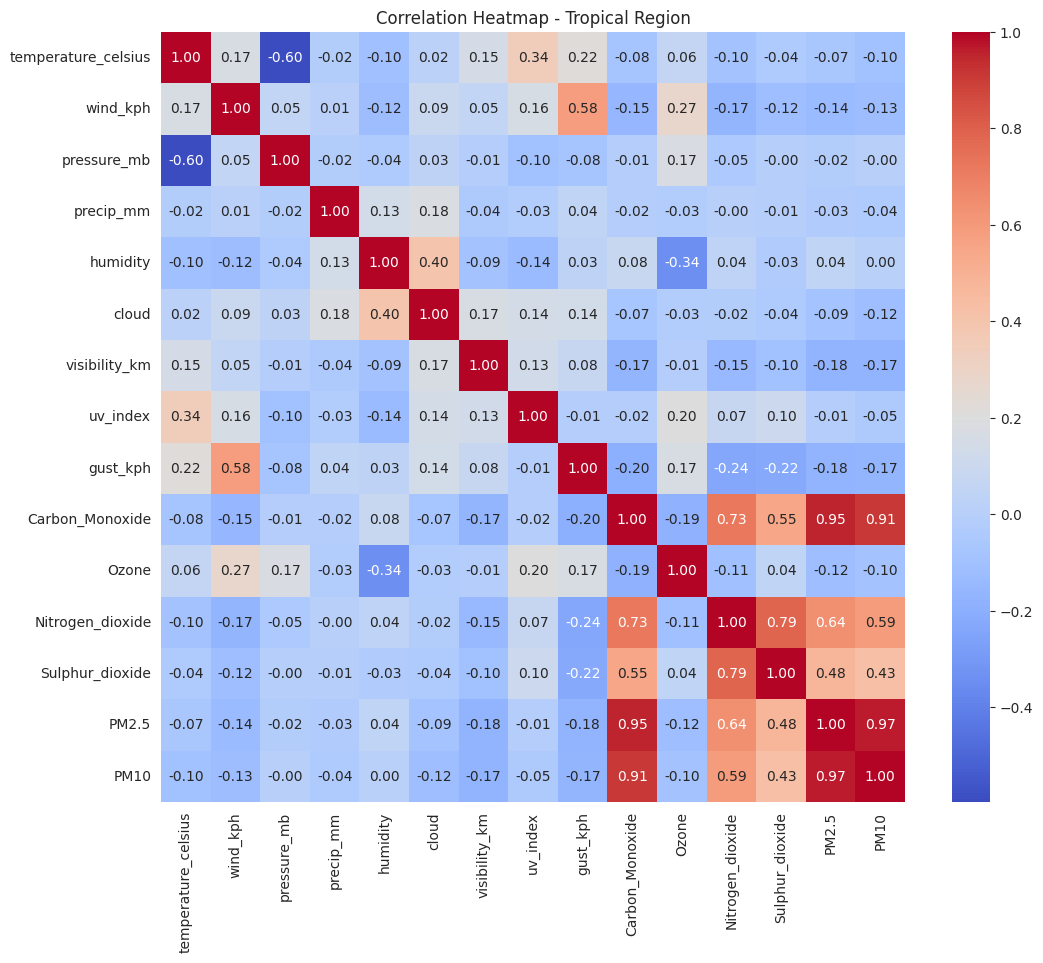

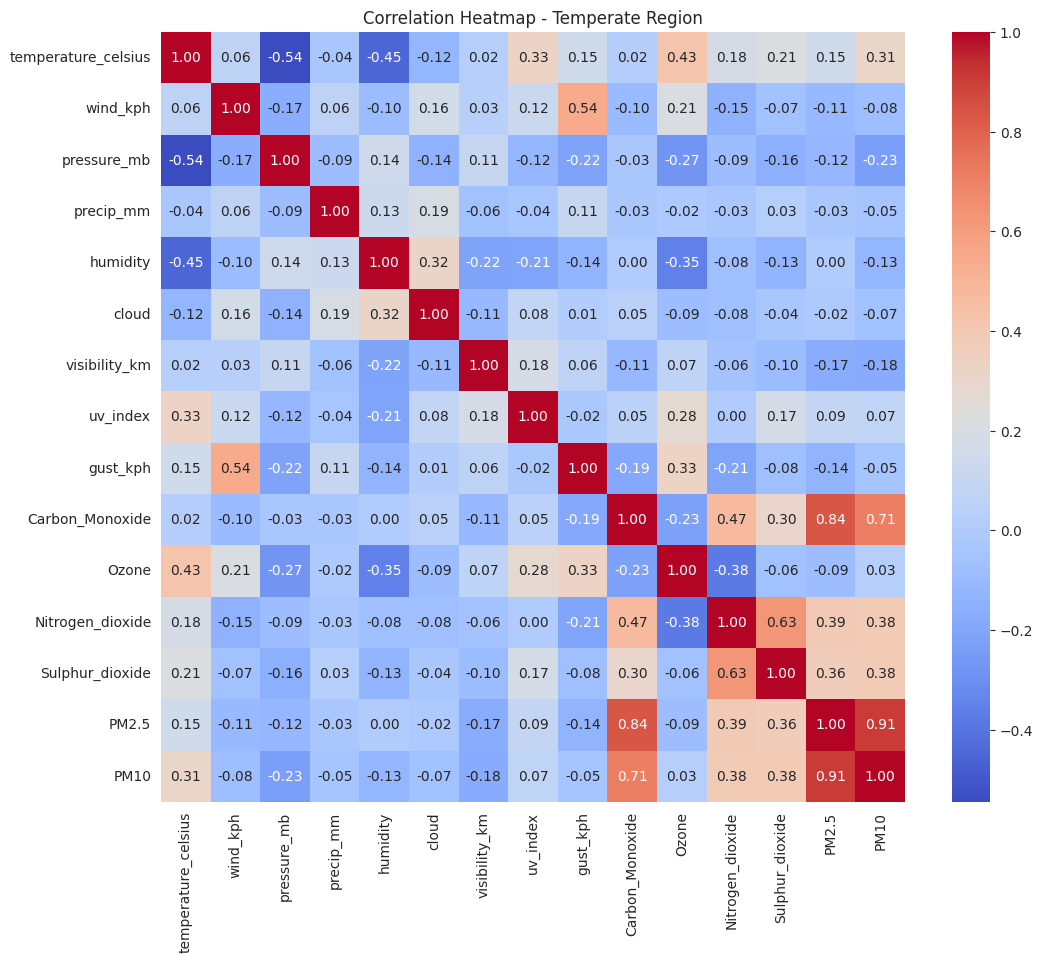

In [79]:
  req_columns = ['temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'visibility_km', 'uv_index', 'gust_kph', 'Carbon_Monoxide', 'Ozone', 'Nitrogen_dioxide','Sulphur_dioxide', 'PM2.5', 'PM10']

def create_correlation_heatmap(data, title):
    correlation_matrix = data[req_columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

create_correlation_heatmap(tropical_data, "Correlation Heatmap - Tropical Region")
create_correlation_heatmap(temperate_data, "Correlation Heatmap - Temperate Region")

### AQI Trends

**For PM 2.5 index**

In [80]:
# Using isin() method to drop multiple columns
pollutant_df = glb_weather.loc[:, ~glb_weather.columns.isin(['PM2.5', 'PM10', 'us-epa-index', 'gb-defra-index'])]
pollutant_df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'condition_text', 'wind_kph', 'wind_degree', 'wind_direction',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius',
       'visibility_km', 'uv_index', 'gust_kph', 'Carbon_Monoxide', 'Ozone',
       'Nitrogen_dioxide', 'Sulphur_dioxide', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase', 'moon_illumination', 'heat_zone', 'region'],
      dtype='object')

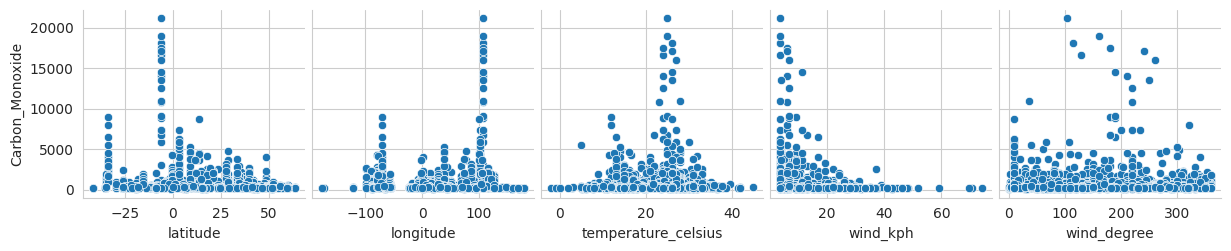

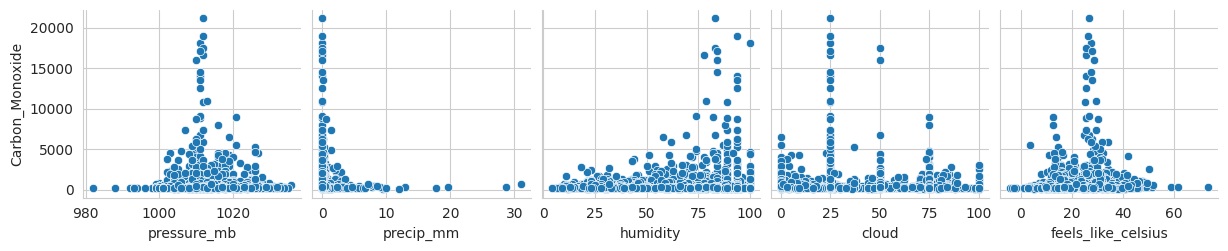

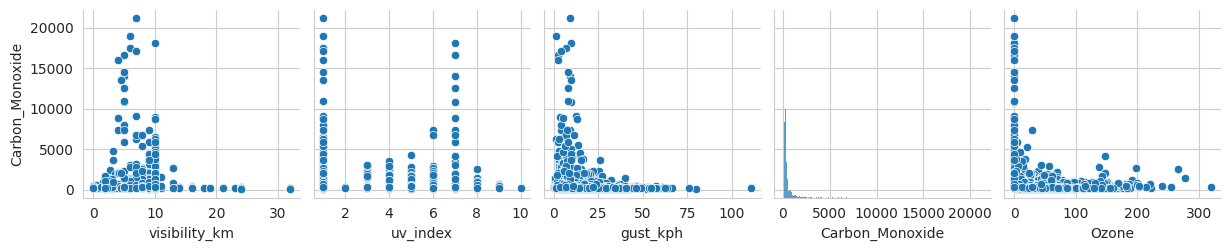

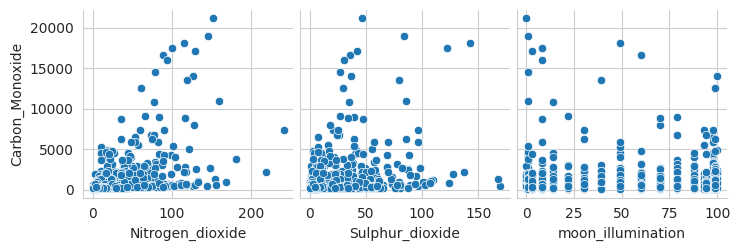

In [81]:
# Correlation using pairplot

pollutant_df_num = pollutant_df.select_dtypes(include = ['float64', 'int64'])

for i in range(0, len(pollutant_df_num.columns),5):
    sns.pairplot(pollutant_df_num, y_vars ='Carbon_Monoxide', x_vars = pollutant_df_num.columns[i:i+5])


Climate Zone vs Major Pollutant Level (Median)

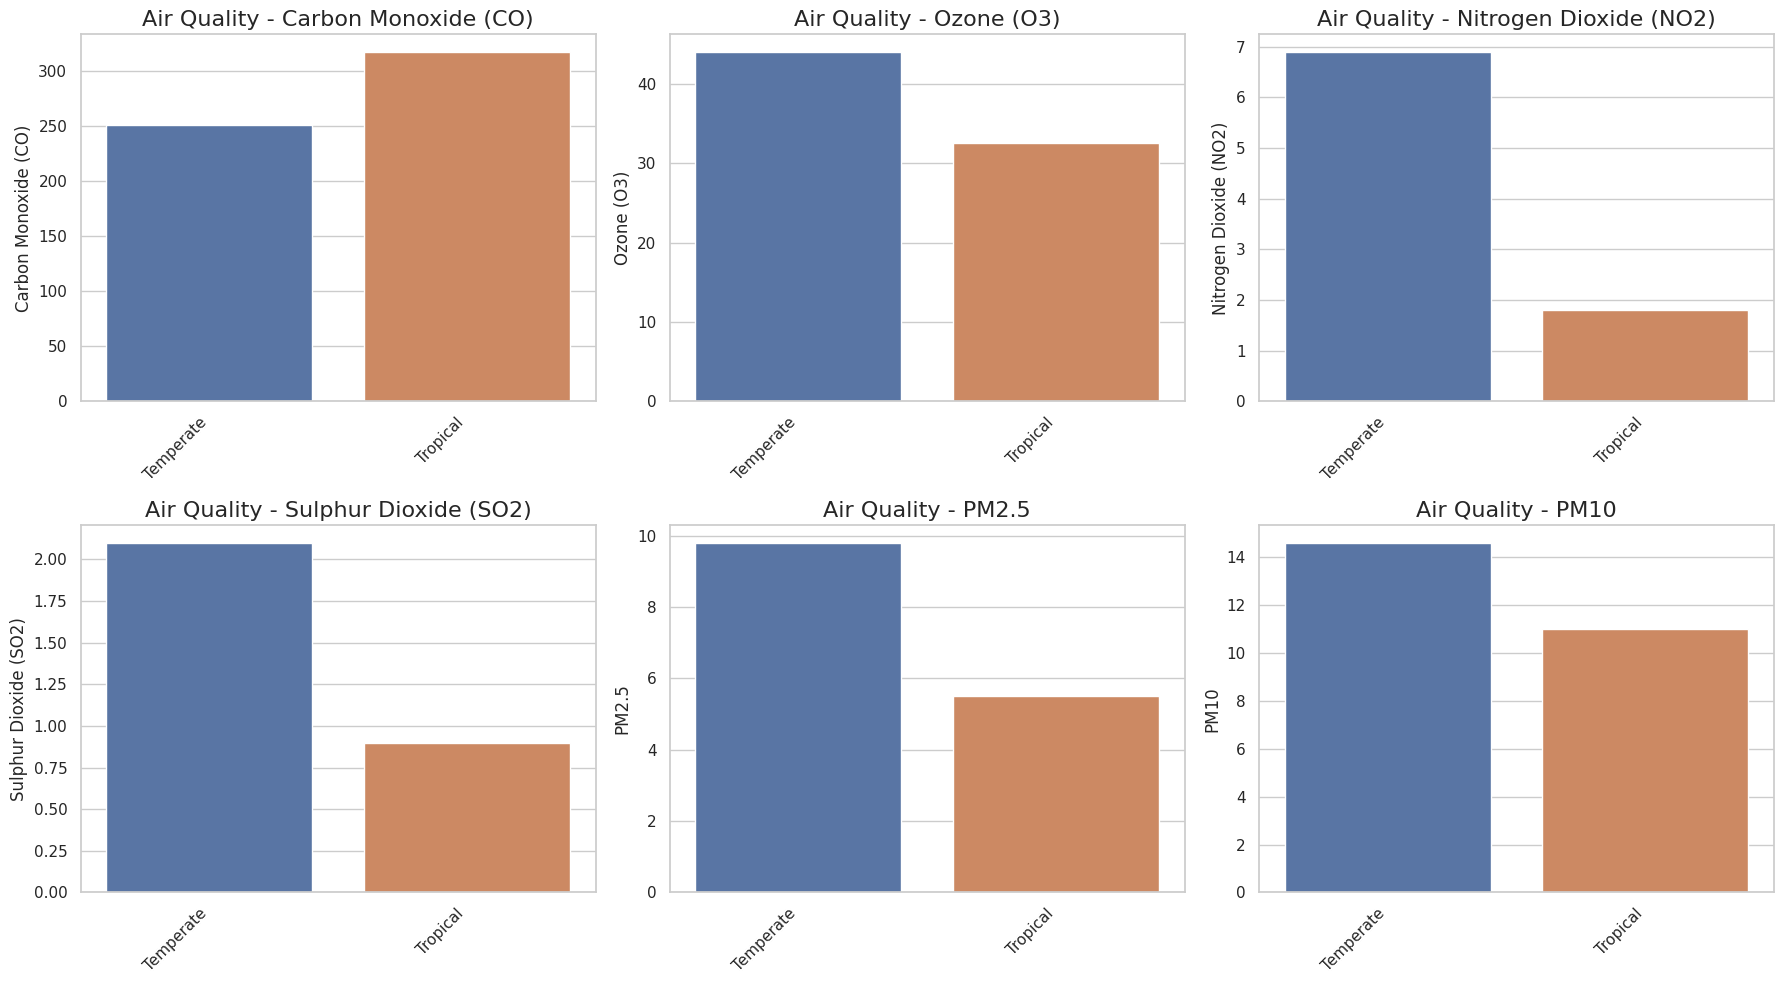

In [82]:
glb_weather.rename(columns={
    'Carbon_Monoxide': 'Carbon Monoxide (CO)',
    'Ozone': 'Ozone (O3)',
    'Nitrogen_dioxide': 'Nitrogen Dioxide (NO2)',
    'Sulphur_dioxide': 'Sulphur Dioxide (SO2)',
    'PM2.5': 'PM2.5',
    'PM10': 'PM10'
}, inplace=True)

# Group and calculate medians
grouped_data = glb_weather.groupby('region').agg({
    'Carbon Monoxide (CO)': 'median',
    'Ozone (O3)': 'median',
    'Nitrogen Dioxide (NO2)': 'median',
    'Sulphur Dioxide (SO2)': 'median',
    'PM2.5': 'median',
    'PM10': 'median'
}).reset_index()

sns.set(style="whitegrid")

# subplots : 2 x 3
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Bar charts for each air quality metric
metrics = ['Carbon Monoxide (CO)', 'Ozone (O3)', 'Nitrogen Dioxide (NO2)', 'Sulphur Dioxide (SO2)', 'PM2.5', 'PM10']

for i, metric in enumerate(metrics):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    sns.barplot(data=grouped_data, x='region', y=metric, ax=ax)
    ax.set_title(f'Air Quality - {metric}',fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

*   Higher Air Pollution level in Temerate Zone : Typically, warm rising air near the ground lifts pollution away, but during the winter the layer of warm air acts like a lid, keeping cold air at the surface.



## Hypothesis Testing

**Hypothesis Test: Air quality between coastal and landlocked countries**

In [84]:
coastal_countries = ['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'South Africa', 'Spain', 'United Kingdom', 'United States']
landlocked_countries = ['Afghanistan', 'Armenia', 'Austria', 'Belarus', 'Bolivia', 'Botswana', 'Burkina Faso', 'Hungary', 'Kazakhstan', 'Laos', 'Mali', 'Mongolia', 'Nepal', 'Paraguay', 'Rwanda', 'Switzerland', 'Uganda', 'Zimbabwe']

coastal_data = glb_weather[glb_weather['country'].isin(coastal_countries)]['PM2.5']
landlocked_data = glb_weather[glb_weather['country'].isin(landlocked_countries)]['PM2.5']

t_stat_air_quality, p_value_air_quality = stats.ttest_ind(coastal_data, landlocked_data)
t_stat_air_quality, p_value_air_quality

(5.8207752657048735, 8.557563716938736e-09)

**Result:** Since the p-value is significantly smaller than 0.05, we reject the null hypothesis. This suggests that there is a statistically significant difference in air quality (PM2.5 levels) between coastal and landlocked countries

**Hypothesis test using the t-test and determine whether there is a significant difference in AQI values between the two groups**

In [100]:
temperate_cntry_grp = temperate_data.groupby('country', as_index=False)
temperate_rand_country_list = np.random.choice(temperate_data['country'].unique(), 16)
sample1 = temperate_rand_country_list[:8]
sample2 = temperate_rand_country_list[8:]

group1 = pd.DataFrame()
group2 = pd.DataFrame()

for country in sample1:
  group_data = temperate_cntry_grp.get_group(country).reset_index()
  group1 = group1.append(group_data, ignore_index=True)

for country in sample2:
  group_data = temperate_cntry_grp.get_group(country).reset_index()
  group2 = group2.append(group_data, ignore_index=True)


# Separate the AQI data for the two groups
group1_aqi = group1['gb-defra-index']
group2_aqi = group2['gb-defra-index']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group1_aqi, group2_aqi)

# Print the results
print('T-statistic:', t_stat)
print('P-value:', p_value, '\n\n')

T-statistic: 2.7773133045315572
P-value: 0.005776197814597932 




<ipython-input-100-58140651f009>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-100-58140651f009>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-100-58140651f009>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-100-58140651f009>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-100-58140651f009>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-100-58140651f009>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi